### Digits Dataset

Trong bài mẫu này về phân loại nhị phân hai chữ số được trích ra trong dữ liệu từ thư viện `sklearn`. Đồng thời, bài này cũng sẽ triển khai bằng thư viện `sklearn` để tìm giá trị tối ưu của bài toán. Các bạn sẽ thực hành code từng bước bên trong thuật toán trong phần bài tập của tuần này. 

<img src="images/digits-dataset.png" style="width:50%;height:50%;">

### Load dữ liệu từ sklearn

Bộ dữ liệu này đã có sẵn trong thư viện nên các bạn không cần phải tải xuống. Tuy nhiên, dữ liệu này tương đối nhỏ. Chính vì vậy mà các bạn có thể sử dụng bộ dữ liệu chữ viết tay trong cơ sở dữ liệu MNIST.

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

Bộ dữ liệu bao gồm 1797 dữ liệu (gồm các ảnh kích thước 8x8 từ 0 - 9)

In [2]:
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Trực quan hoá dữ liệu 

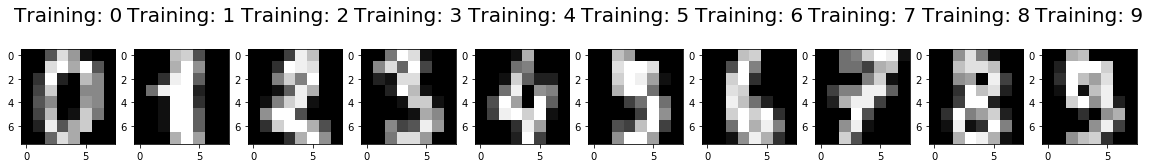

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Các bạn có thể lựa chọn tuỳ ý 2 số bất kỳ để phân loại. Trong bài này, sẽ sử dụng số 8 và 9 vì 2 số này có thể dễ bị nhầm lẫn với nhau. 

```
digits.target == k
với k là số bạn muốn thực hiện so sánh.
```

In [4]:
X0 = digits.data[np.where(digits.target == 8)[0]]
X1 = digits.data[np.where(digits.target == 9)[0]]

y0 = digits.target[np.where(digits.target == 8)[0]]
y1 = digits.target[np.where(digits.target == 9)[0]]

In [5]:
# Nối vào thành 1 ma trận. 
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((y0, y1)) 

### Chia dữ liệu thành tập Train và tập Test 

Chia dữ liệu với tỷ lệ 75% Training và 25% Test.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [7]:
print("X_train_shape: ", X_train.shape)
print("X_test_shape: ", X_test.shape)

X_train_shape:  (265, 64)
X_test_shape:  (89, 64)


### 4 bước sử dụng Scikit-learn để phân loại 

**Bước 1:** Import model bạn muốn sử dụng. Trong bài này dùng để phân loại nên sẽ Import model `LogisticRegression`

In [8]:
from sklearn.linear_model import LogisticRegression

**Bước 2:** Tạo một biến lưu Model

In [9]:
logisticRegr = LogisticRegression()

**Bước 3:** Thực hiện Training: x (digits) và y (labels)

In [10]:
logisticRegr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Bước 4:** Thực hiện dự đoán 

In [11]:
# Dự đoán 1 giá trị đầu 
logisticRegr.predict(X_test[0].reshape(1,-1))

array([8])

In [12]:
# Dự đoán 10 giá trị trong 1 lần 
logisticRegr.predict(X_test[0:10])

array([8, 8, 8, 9, 9, 9, 9, 9, 9, 9])

In [13]:
# Dự đoán trên toàn bộ tập Test
predictions = logisticRegr.predict(X_test)

### Đo hiệu suất mô hình 

Thực hiện kiểm tra các giá trị dự đoán với giá trị thực xem mô hình dự đoán chính xác bao nhiêu %.

In [14]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9887640449438202


### Confusion Matrix 
Là một phương pháp đánh giá kết quả của những bài toán phân loại với việc xem xét cả những chỉ số về độ chính xác và độ bao quát của các dự đoán cho từng lớp. 

Chi tiết về Confusion Matrix sẽ được đề cập trong bài "Advice for Applying Machine Learning".

In [15]:
import numpy as np 
import seaborn as sns
from sklearn import metrics

In [16]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[43  0]
 [ 1 45]]


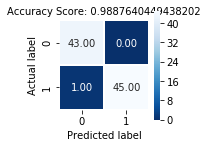

In [17]:
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

### Tài liệu tham khảo 

[1] Logistic Regression using Python 